<a href="https://colab.research.google.com/github/Sushantstha2025/AI_worksheet/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
# ==============================
# 0. Imports
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")


In [66]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

# Basic inspection
print("First 5 rows:")
display(df.head())

print("\nInfo about dataset:")
df.info()

print("\nStatistical summary:")
display(df.describe())

# Missing values
print("\nMissing values per column:")
display(df.isna().sum())

df = df.dropna(subset=['PM2.5'])

y = df['PM2.5']
X = df.drop(columns=['PM2.5'])


First 5 rows:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong



Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB

Statistical summary:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000



Missing values per column:


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,696
PM10,484
SO2,669
NO2,754
CO,1297


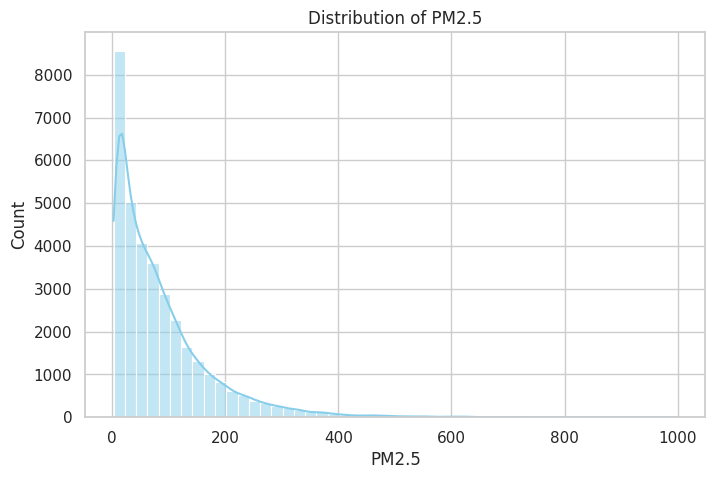

In [67]:
# Target Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['PM2.5'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Count')
plt.show()


In [68]:
# Numeric features (excluding target PM2.5)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('PM2.5')  # target

# Categorical columns
cat_cols = ['wd', 'station']  # wind direction and station

# For scatterplots: pick top 4 numeric features
key_features = ['DEWP', 'TEMP', 'PRES', 'WSPM']  # corrected 'WSPM' instead of 'Iws'


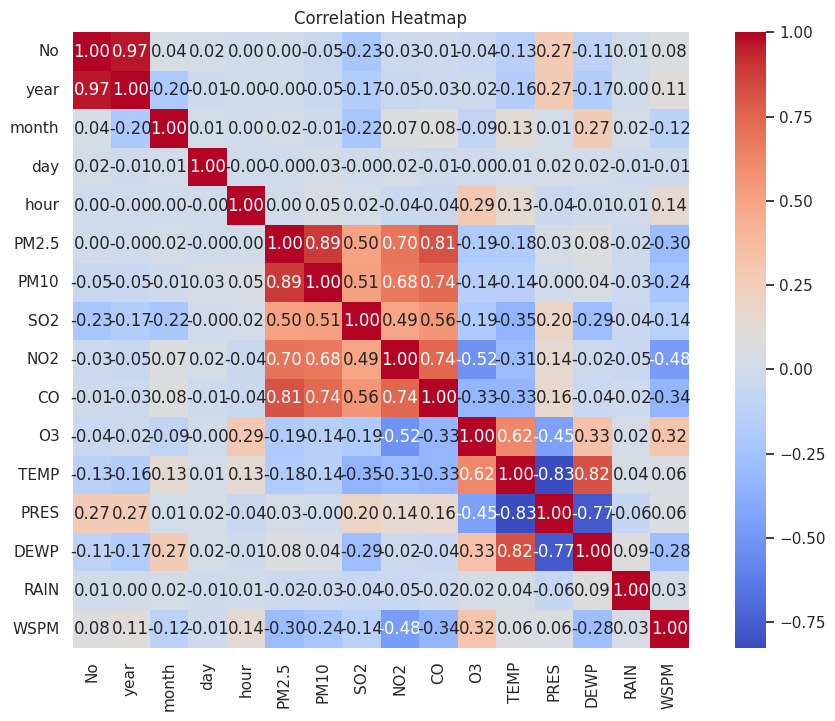


Features most correlated with PM2.5:


,PM2.5
PM2.5,1.000000
PM10,0.889625
CO,0.814394
NO2,0.697300
SO2,0.502324
DEWP,0.076083
PRES,0.031721
month,0.019348
hour,0.004413
No,0.000856


In [69]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

# Correlation with PM2.5
corr_target = corr['PM2.5'].sort_values(ascending=False)
print("\nFeatures most correlated with PM2.5:")
display(corr_target)


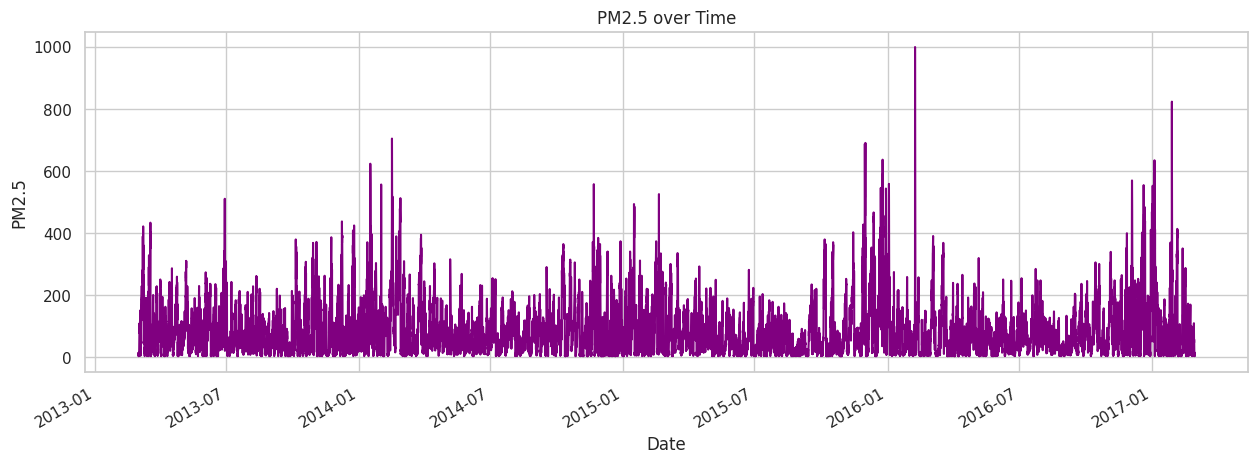

In [70]:
# Time Series PM2.5
df['date'] = pd.to_datetime(df[['year','month','day','hour']])
df.set_index('date', inplace=True)

plt.figure(figsize=(15,5))
df['PM2.5'].plot(color='purple')
plt.title('PM2.5 over Time')
plt.ylabel('PM2.5')
plt.xlabel('Date')
plt.show()


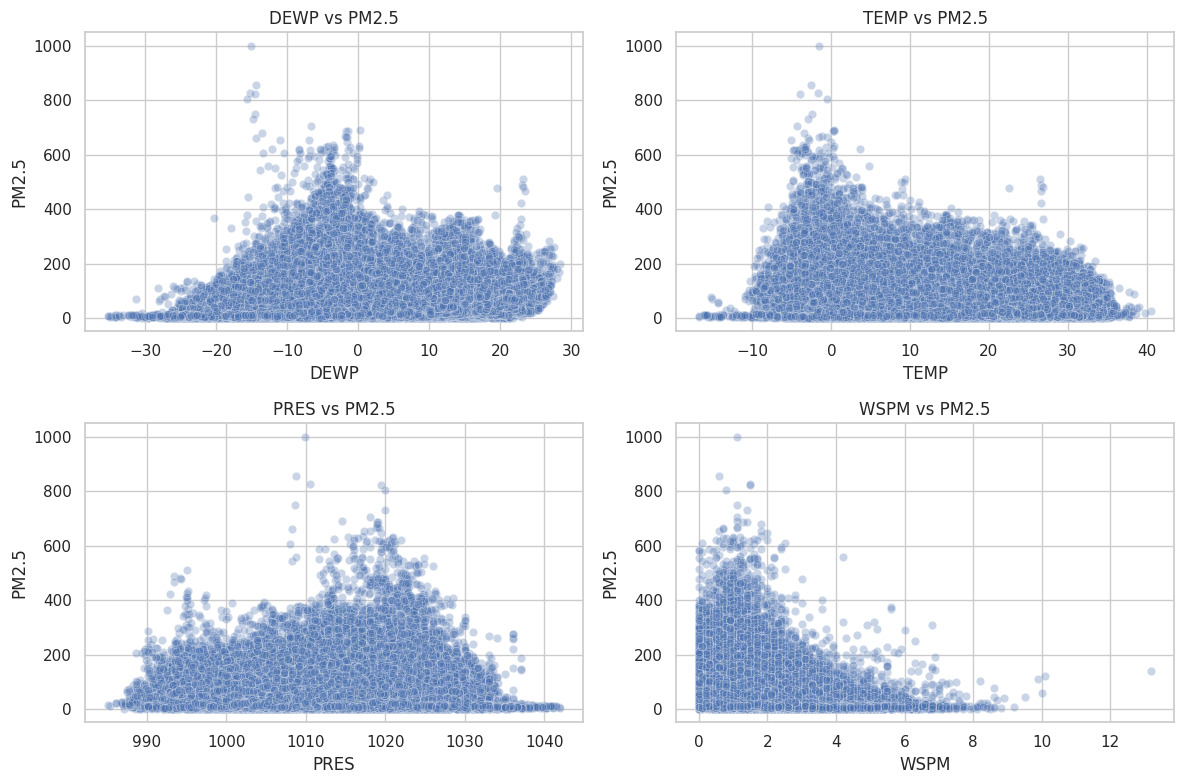

In [71]:
# ScatterPlots: Key Features vs PM 2.5
num_features = len(key_features)
cols = 2  # 2 plots per row
rows = int(np.ceil(num_features / cols))

plt.figure(figsize=(6*cols, 4*rows))
for i, col in enumerate(key_features):
    plt.subplot(rows, cols, i+1)
    sns.scatterplot(x=df[col], y=df['PM2.5'], alpha=0.3)
    plt.title(f'{col} vs PM2.5')
plt.tight_layout()
plt.show()




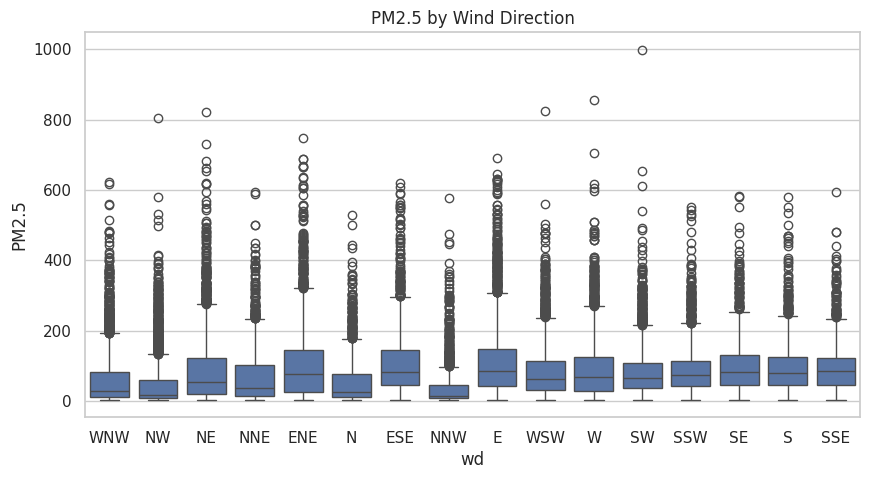

In [72]:
# Box plots
plt.figure(figsize=(10,5))
sns.boxplot(x='wd', y='PM2.5', data=df)
plt.title('PM2.5 by Wind Direction')
plt.show()


In [73]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Numeric & categorical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

In [74]:
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
    ]), cat_cols)
])

In [75]:
from sklearn.model_selection import train_test_split

X = df.drop('PM2.5', axis=1)
y = df['PM2.5']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [76]:
# Fit Lasso on preprocessed training data to select features
lasso_fs = Pipeline([
    ('prep', preprocessor),
    ('model', Lasso(alpha=0.001, max_iter=10000))
])

lasso_fs.fit(X_train, y_train)

# Use SelectFromModel to pick important features
selector = SelectFromModel(lasso_fs.named_steps['model'], prefit=True)

# Transform training and test sets
X_train_sel = selector.transform(lasso_fs.named_steps['prep'].transform(X_train))
X_test_sel = selector.transform(lasso_fs.named_steps['prep'].transform(X_test))

print("Selected features shape:", X_train_sel.shape)


Selected features shape: (27494, 30)


In [77]:
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(
    Ridge(),
    param_grid=ridge_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
ridge_grid.fit(X_train_sel, y_train)
best_ridge = ridge_grid.best_estimator_


In [78]:
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
lasso_grid = GridSearchCV(
    Lasso(max_iter=10000),
    param_grid=lasso_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
lasso_grid.fit(X_train_sel, y_train)
best_lasso = lasso_grid.best_estimator_


In [79]:
dt_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=dt_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
dt_grid.fit(X_train_sel, y_train)
best_dt = dt_grid.best_estimator_


In [80]:
results = []

In [81]:
# Ridge
y_pred_ridge = best_ridge.predict(X_test_sel)
results.append({
    'Model': 'Ridge',
    'CV R2': ridge_grid.best_score_,
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    'Test R2': r2_score(y_test, y_pred_ridge)
})

In [82]:
# Lasso
y_pred_lasso = best_lasso.predict(X_test_sel)
results.append({
    'Model': 'Lasso',
    'CV R2': lasso_grid.best_score_,
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    'Test R2': r2_score(y_test, y_pred_lasso)
})

In [83]:
# Decision Tree
y_pred_dt = best_dt.predict(X_test_sel)
results.append({
    'Model': 'Decision Tree',
    'CV R2': dt_grid.best_score_,
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    'Test R2': r2_score(y_test, y_pred_dt)
})

In [84]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score  # Added missing import
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("Training Multilayer Perceptron (MLP) for Regression")

mlp_reg = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42,
    early_stopping=True,   # Stops training when validation score doesn't improve
    validation_fraction=0.1
)

# Fit the model
mlp_reg.fit(X_train_sel, y_train)

# Predictions
y_pred_mlp = mlp_reg.predict(X_test_sel)

# Evaluation on Test Set
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Cross-validation for R2 (to be consistent with your table)
mlp_cv_scores = cross_val_score(mlp_reg, X_train_sel, y_train, cv=5, scoring='r2')
best_mlp_cv = mlp_cv_scores.mean()

print(f"MLP Test RMSE: {rmse_mlp:.4f}")
print(f"MLP Test R-squared: {r2_mlp:.4f}")

# Append to your existing results list
results.append({
    'Model': 'MLP (Neural Net)',
    'CV R2': best_mlp_cv,
    'Test RMSE': rmse_mlp,
    'Test R2': r2_mlp
})


Training Multilayer Perceptron (MLP) for Regression
MLP Test RMSE: 26.6960
MLP Test R-squared: 0.9067



Final Model Comparison (Regression):
              Model   CV R2  Test RMSE  Test R2
0             Ridge  0.8534    36.2812   0.8278
1             Lasso  0.8534    36.2838   0.8277
2     Decision Tree  0.9093    30.0901   0.8815
3  MLP (Neural Net)  0.9401    26.6960   0.9067


/tmp/ipython-input-2861631420.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test R2', data=results_df, palette='viridis')


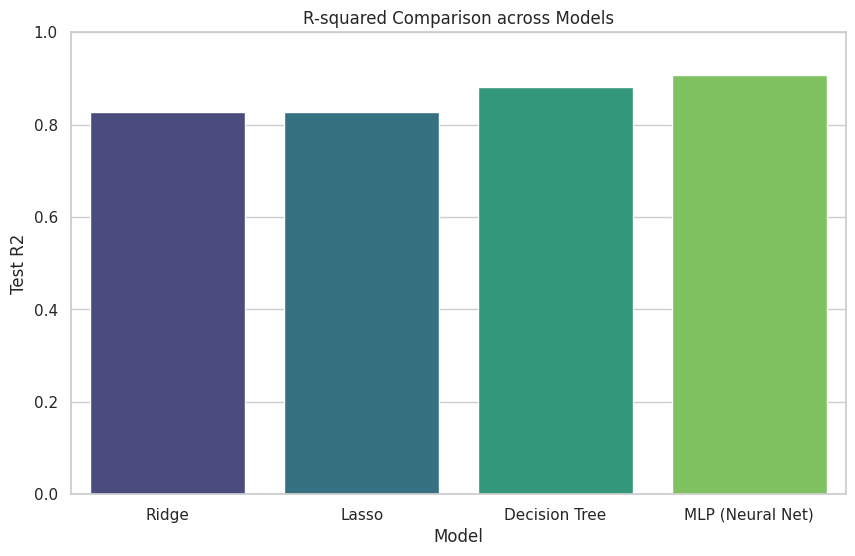

In [85]:
# Display updated results
results_df = pd.DataFrame(results)
print("\nFinal Model Comparison (Regression):")
print(results_df.round(4))

# Visualize R2 Score comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test R2', data=results_df, palette='viridis')
plt.title('R-squared Comparison across Models')
plt.ylim(0, 1) # Set limit based on your expected R2 range
plt.show()

In [86]:
# Step 3: Hyperparameter tuning on reduced features
# Ridge
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(
    Ridge(),
    param_grid=ridge_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
ridge_grid.fit(X_train_sel, y_train)
best_ridge_params = ridge_grid.best_params_

In [87]:
# Lasso
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
lasso_grid = GridSearchCV(
    Lasso(max_iter=10000),
    param_grid=lasso_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
lasso_grid.fit(X_train_sel, y_train)
best_lasso_params = lasso_grid.best_params_

In [88]:
# Decision Tree
dt_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=dt_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
dt_grid.fit(X_train_sel, y_train)
best_dt_params = dt_grid.best_params_

In [89]:
print("Best Ridge params:", best_ridge_params)
print("Best Lasso params:", best_lasso_params)
print("Best Decision Tree params:", best_dt_params)

Best Ridge params: {'alpha': 10.0}
Best Lasso params: {'alpha': 0.01}
Best Decision Tree params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [90]:
# Training using tuned params
# Ridge
ridge_final = Ridge(**best_ridge_params)
ridge_final.fit(X_train_sel, y_train)

Ridge(alpha=10.0)

In [91]:
# Lasso
lasso_final = Lasso(**best_lasso_params, max_iter=10000)
lasso_final.fit(X_train_sel, y_train)

Lasso(alpha=0.01, max_iter=10000)

In [92]:
# Decision Tree
dt_final = DecisionTreeRegressor(**best_dt_params, random_state=42)
dt_final.fit(X_train_sel, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

In [105]:
results = []

In [106]:
# Ridge
y_pred_ridge = ridge_final.predict(X_test_sel)
results.append({
    'Model': 'Ridge',
    'CV R2': ridge_grid.best_score_,
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    'Test R2': r2_score(y_test, y_pred_ridge),
    'MSE':mean_squared_error(y_test, y_pred_ridge)
})

In [107]:
# Lasso
y_pred_lasso = lasso_final.predict(X_test_sel)
results.append({
    'Model': 'Lasso',
    'CV R2': lasso_grid.best_score_,
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    'Test R2': r2_score(y_test, y_pred_lasso),
    'MSE':mean_squared_error(y_test, y_pred_lasso)
})

In [108]:
# Decision Tree
y_pred_dt = dt_final.predict(X_test_sel)
results.append({
    'Model': 'Decision Tree',
    'CV R2': dt_grid.best_score_,
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    'Test R2': r2_score(y_test, y_pred_dt),
    'MSE':mean_squared_error(y_test, y_pred_dt)
})

In [109]:
results_df = pd.DataFrame(results)
print(results_df)

           Model     CV R2  Test RMSE   Test R2          MSE
0          Ridge  0.853351  36.281222  0.827764  1316.327063
1          Lasso  0.853369  36.283795  0.827739  1316.513780
2  Decision Tree  0.909296  30.090106  0.881530   905.414449
